In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import WordPunctTokenizer

from wordcloud import WordCloud

Duplicate key in file WindowsPath('c:/Users/god12/Anaconda3/envs/wassup/Lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 263 ('font.family:  sans-serif')


In [5]:
#df = pd.read_csv('eng_pop.csv')
#df = pd.read_csv('eng_rock.csv')
#df = pd.read_csv('eng_folk.csv')
#df = pd.read_csv('eng_hiphop.csv')
df = pd.read_csv('eng_rnb.csv')
print(len(df))
df.head()

3336


,Title,Likes,Singer,Lyrics
0,Like I Do,"31,459",J.Tajor,(Intro)\nYeah-eah-eah\n\nThat's a drop-top cou...
1,HEARTBREAK ANNIVERSARY,"90,539",Giveon,HEARTBREAK ANNIVERSARY - Giveon\nOoh oh woah\n...
2,At My Worst,"127,901",Pink Sweat$,Can I call you baby\nCan you be my friend\nCan...
3,When I Was Your Man,"134,423",Bruno Mars,Same bed but it feels just\nA little bit bigge...
4,Someone Like You,"189,714",Adele,I heard That you're settled down\nThat you Fou...


In [6]:
lyrics = df.Lyrics.to_list()
print(len(lyrics))
print(lyrics[0])

#file_name = 'eng_pop_text.txt'
#file_name = 'eng_rock_text.txt'
#file_name = 'eng_folk_text.txt'
#file_name = 'eng_hiphop_text.txt'
file_name = 'eng_rnb_text.txt'
with open(file_name, 'w', encoding = 'utf-8') as file:
    file.write('\n'.join(lyrics))

3336
(Intro)
Yeah-eah-eah

That's a drop-top coupe
Said you wanna drive it down real soon
I just wanna love you like I do
Cause I never had someone like you

Ain't nobody got this love
Got me cuffed
Ain't nobody bae
All I need is love
I just wanna run away with you

(Verse 1)
I'm just hoping that you see and you notice
Can't stop with the way I been falling

Fall back cause I'll catch when you falling
I just need to know your mine when I'm calling

Girl let me provide your needs
Freaky girl under the sheets (ooh-ooh ooh)

But you love when things start slowing down
I know, you got me baby

(Chorus 1)
That's a drop-top coupe
Said you wanna drive it down real soon
I just wanna love you like I do
Cause I nеver had someone likе you

Ain't nobody got this love
Got me cuffed
Ain't nobody bae
All I need is love
I just wanna run away with you

(Verse 2)
Baby say you love me cause that's all I need
Drop on bag cause its all on me (yeah)
I put my trust in you cause I'm all in
I keep it tied up t

In [7]:
with open('eng_rnb_text.txt', 'r', encoding = 'utf-8') as file:
    lyrics = file.read()
print(lyrics[:50])

(Intro)
Yeah-eah-eah

That's a drop-top coupe
Said


In [14]:
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\god12\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\god12\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


Emma
refuse
permit


In [8]:
find_pos = ['NN', 'NNS', 'NNP', 'NNPS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'JJ', 'JJR', 'JJS']
def normalize(lyric):
    nouns = []
    for word in nltk.tag.pos_tag(nltk.tokenize.word_tokenize(lyric)):
        if word[1] in find_pos:
            nouns.append(word[0])
    lyric_noun = [noun for noun in nouns if len(noun) > 1]
    return lyric_noun

In [9]:
normalized_text = normalize(lyrics)
normalized_text[:5]

['Intro', 'Yeah-eah-eah', "'s", 'drop-top', 'coupe']

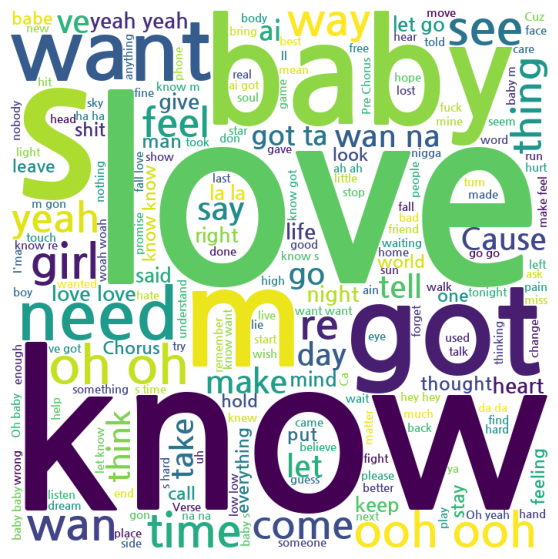

In [10]:
text = ' '.join(normalized_text)
wc = WordCloud(font_path = 'NanumGothicBold.ttf', width = 700, height = 700, background_color = 'white').generate(text)
#wc.to_file('wc/eng_pop_wc.png')
#wc.to_file('wc/eng_rock_wc.png')
#wc.to_file('wc/eng_folk_wc.png')
#wc.to_file('wc/eng_hiphop_wc.png')
wc.to_file('wc/eng_rnb_wc.png')
plt.figure(figsize = (7, 7))
plt.axis('off')
plt.imshow(wc)
plt.show()